In [0]:
#Milestone 1 - ANN
"""Epoch 45: Train err: 2.3768524369178254, Train loss: 9.565495610237122 |Validation err: 2.4339216453787125, Validation loss: 10.037699146270752"""
#Milestone 2 - Surrounding ANN
"""Epoch 28: Train err: 2.209493298325543, Train loss: 8.441690085685416 |Validation err: 2.305450635777982, Validation loss: 8.75162491431603"""
#Milestone 2 - Focused RNN
"""Epoch 45: Train err: 2.4221065864825215, Train loss: 9.995889015819715 |Validation err: 2.4251071704415033, Validation loss: 9.692658022830361"""
#Milestone 3 - Surrounding RNN
"""Epoch 44: Train err: 2.3512696408416187, Train loss: 9.290438038029082 |Validation err: 2.544152707211132, Validation loss: 11.564151604970297"""
#Milestone 3 - Surrounding GRU
"""Epoch 40: Train err: 2.298863480285685, Train loss: 8.73277427725596 |Validation err: 2.4770519715447668, Validation loss: 10.617209951082865"""
#Milestone 3 - Surrounding LTSM:
"""Epoch 28: Train err: 2.342810915274806, Train loss: 9.048288182036517 |Validation err: 2.488783025575083, Validation loss: 10.927148024241129"""

In [7]:
######## >>>>>>>>>>> For the google colab to be able to access the meta files you must add the APS360 team shared folder to your drive by right clicking on it <<<<<<<<<<< ##############
#mount googledrive
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
# Prints how many nulls there are in max and min temp
def test_null_csv_daily(dir, station, start_year, end_year, out_name =  None):
    """
      Args:
          station (string): eg. "ON_6158355"
          start_year (int): Starting year
          end_year (int)  : Ending year
          start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
          out_name (optional string) : change the name of the output file
    """
    if out_name == None:
      out_name = station + '_' + str(start_year) + '-' + str(end_year)
    master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' + dir
    src_path = master_path + 'datasets/'
    newdf = pd.read_csv(src_path + out_name + ".csv")
    print("Max temp nulls: " + str(newdf['Max Temp (°C)'].isnull().sum()))
    print("Min temp nulls: " + str(newdf['Min Temp (°C)'].isnull().sum()))

In [0]:
import pandas as pd
# Interpolates null values in min and max temp cols
def inter_nulls_csv_daily(dir, station, start_year, end_year, out_name =  None):
    """
      Args:
          station (string): eg. "ON_6158355"
          start_year (int): Starting year
          end_year (int)  : Ending year
          start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
          out_name (optional string) : change the name of the output file
    """
    if out_name == None:
      out_name = station + '_' + str(start_year) + '-' + str(end_year)
    master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' + dir
    src_path = master_path + 'datasets/'
    newdf = pd.read_csv(src_path + out_name + ".csv")
    newdf['Max Temp (°C)'] = newdf['Max Temp (°C)'].interpolate()
    newdf['Min Temp (°C)']= newdf['Min Temp (°C)'].interpolate()
    newdf.to_csv( src_path +  out_name + ".csv")

In [0]:
#Raw csv downloaded must be place in /raw folder
#Merged csv will be stored at /datasets folder
# Also interpolates the null max and min temp
def make_csv_daily(dir, station, start_year, end_year, out_name =  None):
  """
    Args:
        station (string): eg. "ON_6158355"
        start_year (int): Starting year
        end_year (int)  : Ending year
        start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
        out_name (optional string) : change the name of the output file
    """
  if out_name == None:
    out_name = station + '_' + str(start_year) + '-' + str(end_year)
  master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' + dir
  src_path = master_path
  dest_path = master_path + 'datasets/'
  fout = open(dest_path + out_name + ".csv","w+")
  in_base = "en_climate_daily_" + station + '_' #eg: 'en_climate_daily_ON_6158355_'
  in_end = '_P1D.csv'
  # first file:
  for line in open(src_path + in_base + str(start_year) + in_end):
      fout.write(line)
  # now the rest:    
  for num in range(start_year + 1, end_year + 1):
      f = open(src_path + in_base + str(num) + in_end)
      f.__next__() # skip the header
      for line in f:
          fout.write(line)
      f.close() # not really needed
  fout.close()
  inter_nulls_csv_daily(dir, station, start_year, end_year, out_name)

In [0]:
stationSurr = ["ON_615S001", "ON_6158751", "ON_615HMAK"]

In [0]:
##### run once #######
make_csv_daily(dir = "data/Target A/target/", station = "ON_6158355", start_year = 2008, end_year = 2014) # run once
make_csv_daily(dir = "data/Target A/surr/", station = stationSurr[0], start_year = 2008, end_year = 2014) # run once
make_csv_daily(dir = "data/Target A/surr/", station = stationSurr[1], start_year = 2008, end_year = 2014) # run once
make_csv_daily(dir = "data/Target A/surr/", station = stationSurr[2], start_year = 2008, end_year = 2014) # run once

In [0]:
import pandas as pd
import numpy as np
import math
from torch.utils.data import Dataset, DataLoader
set_num_attributes = 2
class WeatherSurroundingDataset(Dataset):
    """Weather dataset."""

    def __init__(self, dirSrc, dirSurr, stationSrc, stationSurr, start_year, end_year, days_ahead=1, start_date = 0, end_date = None, num_days = 7, make_csv = False, out_name = None):
        """
        Args:
            dirSrc (string) =  "data/Target A/target/" relative directory of target station
            dirSurr (string) = "data/Target A/surr/" relative directory of surrounding stations
            stationSrc (string): eg. "ON_6158355"
            stationSurr (list of strings)
            start_year (int): Starting year
            end_year (int)  : Ending year
            days_ahead (int): number of days to be predicted
            start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
            end_date (optional int) : end_date = 7 is day 8 of starting year(min = 7 because of LABEL!). If provided changes the end date from last day of last year.
            num_days (optional int) : num_days is the interval of days before the label.
            make_csv (optional bool): If true it will call make_csv_daily function to create the csv from /raw datasets into /datasets
            out_name (optional string) : change the name of the output file which it reads from
        """
        self.days_ahead = days_ahead #janelle
        self.num_days = num_days
        if(out_name == None):
          self.out_name = stationSrc + '_' + str(start_year) + '-' + str(end_year)
        else:
          self.out_name = out_name
        master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' +  dirSrc
        dest_path = master_path + 'datasets/'
        if (make_csv):
          make_csv_daily(dirSrc, stationSrc, start_year, end_year, out_name = out_name)

        self.src_csv = pd.read_csv(dest_path + self.out_name +'.csv')
        
        self.sur_csvs = []

        master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' +  dirSurr
        dest_path = master_path + 'datasets/'
        for station_surr in stationSurr:
          file_name = station_surr + '_' + str(start_year) + '-' + str(end_year)
          if (make_csv):
            make_csv_daily(dirSurr, station_surr, start_year, end_year, out_name = file_name)
          print(dest_path + file_name +'.csv')
          self.sur_csvs.append(pd.read_csv(dest_path + file_name +'.csv'))

        self.start_date = start_date
        if( end_date == None):
          self.end_date = len(self.src_csv) - 1
        else:
          self.end_date = end_date

        for i, cur_sur_csv in enumerate(self.sur_csvs):
          if(len(self.src_csv) != len(cur_sur_csv)):
            if(len(self.src_csv) > len(cur_sur_csv)):
              assert(0) # Surrounding stations don't have sufficient days to fill the dataset
            print("Caution: Traget station has {trg_days} days while surr station idx {idx} has {sur_days} days".format(len(self.src_csv), i, len(cur_sur_csv)))

    def __len__(self):#Ali: TO DO
      return self.end_date - self.start_date + 1 - self.num_days - self.days_ahead  if self.end_date - self.start_date + 1 - self.num_days - self.days_ahead  >= 0 else 0

    def __getitem__(self, idx):
        data = self.src_csv.loc[ idx + self.start_date : idx + self.start_date + self.num_days - 1 , ['Max Temp (°C)', 'Min Temp (°C)'] ]
        
        for cur_csv in self.sur_csvs:
          new_data = cur_csv.loc[ idx + self.start_date : idx + self.start_date + self.num_days - 1 , ['Max Temp (°C)', 'Min Temp (°C)'] ]
          data = np.concatenate([data, new_data], axis=1)

        #predict 2 days ahead - janelle
        start_days_ahead =  idx + self.start_date + self.num_days
        end_days_ahead = start_days_ahead + self.days_ahead - 1  #Ali: Smart
        #label = self.src_csv.loc[ idx + self.start_date + self.num_days, ['Max Temp (°C)', 'Min Temp (°C)'] ] 
        label = self.src_csv.loc[start_days_ahead:end_days_ahead, ['Max Temp (°C)', 'Min Temp (°C)'] ] 
        label = np.asarray(label).flatten()
        label = label.astype('float')
        
        data = data.flatten()

        #print('Data: {}'.format(data))
        #print('Data shape: {}'.format(data.shape))
        #print('Labels shape: {}'.format(label.shape))
        #print('Labels: {}'.format(label[:2]))
        sample = [data, label]

        return sample

    def giveSeasonalSets(self, start_season_day = 0, num_seasons = 4):
        """num_seasons > 1 or meaningless and unknown behaviour"""
        seasonalSets = [None] * num_seasons

        #seasonIntervals = math.ceil(365.25 / num_seasons)
        seasonIntervals = math.floor((self.end_date - self.start_date) / (math.floor((self.end_date - self.start_date + 1) / 365) * num_seasons))

        if(start_season_day > seasonIntervals):
          start_season_day = start_season_day % seasonIntervals
          print("Truncated start_season_day to {}. Accepts values between 0 ~ {}".format(start_season_day, seasonIntervals-1))
        if(start_season_day > 0):
          seasonalSets[-1] = SeasonalDataset(self, 0, start_season_day - 1)
        curLastDay = seasonIntervals + start_season_day - 1
        seasonalSets[0] = SeasonalDataset(self, start_season_day - self.num_days, curLastDay) # start date can include days from previous season to predict current season days

        curStartDay = curLastDay + 1 
        curLastDay = seasonIntervals + curStartDay - 1
        i = 1
        while(curLastDay < self.end_date): # Do not add the last interval
          #print("giveSeasonalSets: " + str(i) + " " + str(curStartDay) + " " + str(curLastDay))
          if(seasonalSets[i] == None ):
            seasonalSets[i] = SeasonalDataset(self, curStartDay - self.num_days, curLastDay)
          else:
            seasonalSets[i] = seasonalSets[i] + SeasonalDataset(self, curStartDay - self.num_days, curLastDay)
          curStartDay = curLastDay + 1
          curLastDay = seasonIntervals + curStartDay - 1
          i += 1
          i %= num_seasons

        # Now add the last set
        curLastDay = self.end_date
        if(seasonalSets[i] == None ):
            seasonalSets[i] = SeasonalDataset(self, curStartDay - self.num_days, curLastDay)
        else:
            seasonalSets[i] = seasonalSets[i] + SeasonalDataset(self, curStartDay - self.num_days, curLastDay)

        return seasonalSets


class SeasonalDataset(WeatherSurroundingDataset):
    """Seasonal dataset. Inherited from WSDataset. Only used in helper function -giveSeasonalSets-"""

    def __init__(self, weathersurroundingDataset, start_date, end_date):
        """
        Args:
            weathersurroundingDataset: Must previously loaded all the years and stations in a WeatherSurroundingDataset
        """
        """Ali: I added this"""
        self.days_ahead = weathersurroundingDataset.days_ahead 
        self.num_days = weathersurroundingDataset.num_days
        self.out_name = weathersurroundingDataset.out_name
        self.src_csv = weathersurroundingDataset.src_csv
        self.sur_csvs = weathersurroundingDataset.sur_csvs
        self.start_date = start_date if start_date >= 0 else 0
        self.end_date = end_date

In [0]:
###Global variable
set_num_days = 7
set_num_stations = 1 + len(stationSurr)
num_attributes = 2 # max/min temp #janelle
num_inputs = set_num_days * (1 + len(stationSurr)) * num_attributes
start_season_day = 50
num_seasons = 4
glob_inp_size = set_num_stations * set_num_attributes
master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/'

In [48]:
start_year_train = 2008
end_year_train = 2013 #changed from 2019 because in our proposal we said 07-16 is train
days_ahead = 2 #janelle
start_date_train = 0
end_date_train = None
num_days_train = set_num_days
stationSrc = "ON_6158355"
dirSrc =  "data/Target A/target/"
dirSurr = "data/Target A/surr/"
trainingSet = WeatherSurroundingDataset(dirSrc, dirSurr, stationSrc, stationSurr, start_year_train, end_year_train, days_ahead, start_date_train, end_date_train, num_days=num_days_train, make_csv = False)

/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615S001_2008-2013.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_6158751_2008-2013.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615HMAK_2008-2013.csv


In [46]:
#janelle
out_name = "ON_6158355" + '_' + str(start_year_train) + '-' + str(end_year_train)
master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' +  dirSrc
dest_path = master_path + 'datasets/'
src_csv = pd.read_csv(dest_path + out_name +'.csv')
#label = src_csv.loc[ [0 + start_date_train + num_days_train, ['Max Temp (°C)', 'Min Temp (°C)'] ] 
label = src_csv.loc[ 0:0, ['Max Temp (°C)', 'Min Temp (°C)'] ] 
label = np.asarray(label).flatten()
label = label.astype('float')
print(label)

[ 2.2 -7.4]


In [0]:
train_seasonal_sets = trainingSet.giveS
easonalSets(start_season_day= start_season_day, num_seasons= num_seasons)

In [49]:
trainingSet[5]

[array([ 8.3,  3. ,  9.5,  1. , 10.5,  2. ,  7.2,  1.9, 13.1,  8. , 14. ,
         4.5, 14.5,  5. , 13.4,  6.3, 13.9, 10.1, 15. , 10. , 15.5, 10.5,
        14.9,  9.5, 12.5,  2. ,  6. ,  3.5,  6.5,  4.5, 11.5,  0. ,  4.1,
         0.6,  4. , -3. ,  4. , -1. ,  3.1, -2.2,  7.9,  2.9,  8. ,  1. ,
         8. ,  2. ,  7.4,  1.5,  4.8,  2.6,  5.5,  1. ,  5. ,  2.5,  3.9,
        -2.2]), array([3.1, 1.1, 4.4, 0.1])]

In [0]:
train_seasonal_sets[-1][5]

[array([ 8.3,  3. ,  9.5,  1. , 10.5,  2. ,  7.2,  1.9, 13.1,  8. , 14. ,
         4.5, 14.5,  5. , 13.4,  6.3, 13.9, 10.1, 15. , 10. , 15.5, 10.5,
        14.9,  9.5, 12.5,  2. ,  6. ,  3.5,  6.5,  4.5, 11.5,  0. ,  4.1,
         0.6,  4. , -3. ,  4. , -1. ,  3.1, -2.2,  7.9,  2.9,  8. ,  1. ,
         8. ,  2. ,  7.4,  1.5,  4.8,  2.6,  5.5,  1. ,  5. ,  2.5,  3.9,
        -2.2]), array([3.1, 1.1])]

In [52]:
start_year_val = 2014
end_year_val = 2014
start_date_val = 0
end_date_val = None
num_days_val = set_num_days
days_ahead_val = 2 #janelle
# station stays the same
validationSet = WeatherSurroundingDataset(dirSrc, dirSurr, stationSrc, stationSurr, start_year_val, end_year_val, days_ahead_val, start_date_train, end_date_train, num_days=num_days_val, make_csv = False)

/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615S001_2014-2014.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_6158751_2014-2014.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615HMAK_2014-2014.csv


In [0]:
val_seasonal_sets = validationSet.giveSeasonalSets(start_season_day= start_season_day, num_seasons= num_seasons)

In [53]:
validationSet[2]

[array([ -7.1, -22.3,  -6. , -25. , -10. , -23. ,  -9.2, -25.3,   0.3,
         -7.2,   0. , -15.5,   0. , -14. ,  -0.9,  -9.4,   1.4,  -1.7,
          1. ,  -3.5,   1.5,  -2. ,   0.2,  -3.2,   2.4, -15.8,  -5. ,
         -9.5,  -4. ,  -8. ,   0.6, -16.4, -15.8, -22.2, -14. , -24.5,
        -15. , -22.5, -16.3, -23.5,  -7.7, -16.2,  -8. , -18.5,  -7.5,
        -17. ,  -8.8, -17.7,  -2.9, -11.8,  -2. , -16.5,  -5. , -12.5,
         -6.5, -15.4]), array([ 4.1, -4. ,  7.3,  2.9])]

In [0]:
val_seasonal_sets[-1][2]

[array([ -7.1, -22.3,  -6. , -25. , -10. , -23. ,  -9.2, -25.3,   0.3,
         -7.2,   0. , -15.5,   0. , -14. ,  -0.9,  -9.4,   1.4,  -1.7,
          1. ,  -3.5,   1.5,  -2. ,   0.2,  -3.2,   2.4, -15.8,  -5. ,
         -9.5,  -4. ,  -8. ,   0.6, -16.4, -15.8, -22.2, -14. , -24.5,
        -15. , -22.5, -16.3, -23.5,  -7.7, -16.2,  -8. , -18.5,  -7.5,
        -17. ,  -8.8, -17.7,  -2.9, -11.8,  -2. , -16.5,  -5. , -12.5,
         -6.5, -15.4]), array([ 4.1, -4. ])]

In [0]:
import torch
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=2, 
                                            num_workers=1, shuffle=True)
for i, data in enumerate(train_loader, 0):
  input, label = data
  print("input:")
  print(input)
  print("label:")
  print(label)

# ANN TRAINING

In [0]:
import os 
from torch.utils.data.sampler import SubsetRandomSampler 
from torchvision import datasets, models, transforms 
import torch.optim as optim
import numpy as np 
import matplotlib.pyplot as plt
import time 
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim 
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms 

### Helper functions

In [0]:
def get_model_name(name, batch_size, learning_rate, epoch, ID = None):
    if(ID == None):
      path = "{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                              batch_size,
                                              learning_rate,
                                              epoch)
    else:
      path = "{0}_bs{1}_lr{2}_epoch{3}_{4}".format(name,
                                              batch_size,
                                              learning_rate,
                                              epoch,
                                              ID)
    return path

In [0]:
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

### Architecture

In [0]:
class weatherSurrRNN(nn.Module):

    def __init__(self, hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = set_num_attributes, n_layers = 1): #,dropout=DROPOUT
        super(weatherSurrRNN, self).__init__()
        self.name = "weatherSurrRNN"
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        self.decoder = nn.Linear(hidden_size, output_size)

    def forward(self, inp,  hidden = None):
        if(hidden == None):
          out, _ = self.rnn(inp)
        else:
          out, _ = self.rnn(inp, hidden)
        out = self.decoder(out[:, -1, :])
        return out

In [0]:
class weatherSurrGRU(nn.Module):

    def __init__(self, hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = set_num_attributes, n_layers = 1): #,dropout=DROPOUT
        super(weatherSurrGRU, self).__init__()
        self.name = "weatherSurrGRU"
        self.rnn = nn.GRU(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        self.decoder = nn.Linear(hidden_size, output_size)

    def forward(self, inp,  hidden = None):
        if(hidden == None):
          out, _ = self.rnn(inp)
        else:
          out, _ = self.rnn(inp, hidden)
        out = self.decoder(out[:, -1, :])
        return out

### Training

In [0]:
# Error defined as mean difference of prediction and reallity
def compute_error(outputs, labels):
  err = 0.0
  number_items = 0
  for j, out in enumerate(outputs, 0):
      err += abs(labels[j][0] - out[0])
      err += abs(labels[j][1] - out[1])
      number_items += 2

  return err, number_items

In [0]:
# Error defined as prediction being off more than 5°C
def compute_error(outputs, labels):
  err = 0.0
  number_items = 0
  for j, out in enumerate(outputs, 0):
      err += (abs(labels[j][0] - out[0]) > 5)
      err += (abs(labels[j][1] - out[1]) > 5)
      number_items += 2

  return err, number_items

In [0]:
def get_accuracy(net, loader, criterion):

    total_loss = 0.0
    total_err = 0.0
    number_items = 0

    for i, data in enumerate(loader, 0):
      inputs, labels = data
      inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size) #########
      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
      #############################################
      outputs = net(inputs.float())
      loss = criterion(outputs, labels.float()) 
      total_loss += loss.item()
      
      cur_err, cur_num = compute_error(outputs, labels)
      total_err += cur_err
      number_items += cur_num
    err = float(total_err) / number_items
    loss = float(total_loss) / (i + 1)
    return err, loss

In [0]:
use_cuda = True
# what are we using as the validation loader
# regression midek: should use MSE (?)
def train(net, trainingSet, validationSet, batch_size, num_epochs, learning_rate, master_path, ID = None, do_save = True):
    torch.manual_seed(777)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=True)
    val_loader = torch.utils.data.DataLoader(validationSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=True)

    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    print ("Training Started...")
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        number_items = 0
        for i, data in enumerate(train_loader, 0): # Itterate through each batch
            #print("Training", i, "out of", len(train_loader))
            # Get the inputs
            inputs, labels = data
            inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size) #########
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              inputs = inputs.cuda()
              labels = labels.cuda()
            #############################################
            

            outputs = net(inputs.float())             # forward pass
            loss = criterion(outputs, labels.float()) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # Calculate the statistics
            total_train_loss += loss.item()

            cur_err, cur_num = compute_error(outputs, labels)
            total_train_err += cur_err
            number_items += cur_num
             

        train_err[epoch] = float(total_train_err) / number_items
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = get_accuracy(net, val_loader, criterion)
        
        torch.save(net.state_dict(), master_path + "Saved states/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID))
        print(("Epoch {}: Train err: {}, Train loss: {} |"
              + "Validation err: {}, Validation loss: {}"
                ).format(
                    epoch + 1,
                    train_err[epoch],
                    train_loss[epoch],
                    val_err[epoch],
                    val_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = master_path + "Checkpoints/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID)

    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # Write the train/test loss/err into CSV file for plotting later
    if(do_save):
      epochs = np.arange(1, num_epochs + 1)
      np.savetxt("{}_train_err.csv".format(model_path), train_err)
      np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
      np.savetxt("{}_val_err.csv".format(model_path), val_err)
      np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

      torch.save(net.state_dict(), master_path + "Saved states/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID))
    


In [0]:
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
weather_surr_RNN = weatherSurrRNN(hidden_size=glob_inp_size)
if(use_cuda):
  weather_surr_RNN = weather_surr_RNN.cuda()
train(weather_surr_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.01, num_epochs=45, master_path = master_path)


Training Started...
Epoch 1: Train err: 10.060804701113023, Train loss: 159.5636790027357 |Validation err: 8.099809784733548, Validation loss: 103.74011834462483
Epoch 2: Train err: 6.9580558312491645, Train loss: 82.52614839109656 |Validation err: 5.8744980748056035, Validation loss: 55.42017396291097
Epoch 3: Train err: 5.225862810218451, Train loss: 47.081202049777936 |Validation err: 4.569780328969715, Validation loss: 33.26880566279093
Epoch 4: Train err: 4.1561233316406225, Train loss: 29.52299350581757 |Validation err: 3.727369023684682, Validation loss: 22.934464772542317
Epoch 5: Train err: 3.4351263726084946, Train loss: 20.124738836941653 |Validation err: 3.2095371915141957, Validation loss: 16.93524718284607
Epoch 6: Train err: 3.1962429566778003, Train loss: 16.698435979346705 |Validation err: 3.0891057667452535, Validation loss: 15.732604185740152
Epoch 7: Train err: 2.9862808710832254, Train loss: 14.313318820848856 |Validation err: 2.932582775629654, Validation loss: 14

In [0]:
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
torch.save(weather_surr_RNN.state_dict(), master_path + "Saved states/first_surr_rnn")

In [0]:
weather_surr_RNN = weatherSurrRNN(hidden_size=glob_inp_size)
if(use_cuda):
  weather_surr_RNN = weather_surr_RNN.cuda()
weather_surr_RNN.load_state_dict(torch.load(master_path + "Saved states/first_surr_rnn"))

<All keys matched successfully>

In [0]:
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
weather_surr_GRU = weatherSurrGRU(hidden_size=glob_inp_size)
if(use_cuda):
  weather_surr_GRU = weather_surr_GRU.cuda()
train(weather_surr_GRU, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.01, num_epochs=45, master_path = master_path)

Training Started...
Epoch 1: Train err: 9.949112216947215, Train loss: 157.89714489244435 |Validation err: 8.230307030769367, Validation loss: 106.88004112243652
Epoch 2: Train err: 6.945833975646807, Train loss: 83.44059267435988 |Validation err: 5.880037685812518, Validation loss: 55.9986244837443
Epoch 3: Train err: 5.048005463577792, Train loss: 45.80449579839837 |Validation err: 4.44455770813553, Validation loss: 31.458154042561848
Epoch 4: Train err: 3.8828429877685258, Train loss: 25.873244181071243 |Validation err: 3.460362884518821, Validation loss: 19.14889693260193
Epoch 5: Train err: 3.250562596955798, Train loss: 17.487288866957574 |Validation err: 3.0013410915542575, Validation loss: 15.126174370447794
Epoch 6: Train err: 2.917954750581156, Train loss: 13.773500161628201 |Validation err: 2.900344897104597, Validation loss: 14.50787091255188
Epoch 7: Train err: 2.7887374628253965, Train loss: 12.624657950989187 |Validation err: 2.675032556778448, Validation loss: 12.429408

In [0]:
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
torch.save(weather_surr_GRU.state_dict(), master_path + "Saved states/first_surr_gru")

In [0]:
weather_surr_GRU = weatherSurrGRU(hidden_size=glob_inp_size)
if(use_cuda):
  weather_surr_GRU = weather_surr_GRU.cuda()
weather_surr_GRU.load_state_dict(torch.load(master_path + "Saved states/first_surr_gru"))

<All keys matched successfully>

In [0]:
load_path = master_path + "Saved states/"
weather_surr_GRU_test = weatherSurrGRU(hidden_size=glob_inp_size) # weatherSurrGRU_bs30_lr0.01_epoch40
weather_surr_GRU_test.load_state_dict(torch.load(load_path + get_model_name(weather_surr_GRU_test.name, 30, 0.01, 40)))

<All keys matched successfully>

### Tuning

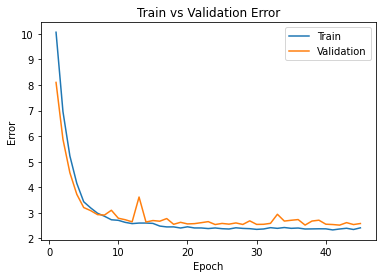

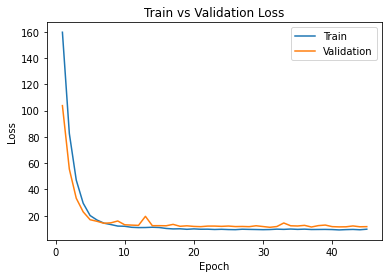

In [0]:
model_path = get_model_name("weatherSurrRNN", batch_size=30, learning_rate=0.01, epoch=45)

plot_training_curve(model_path)

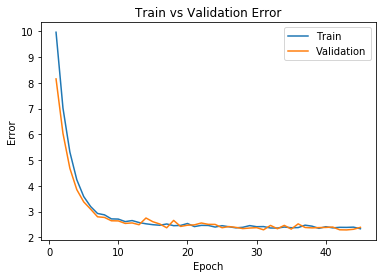

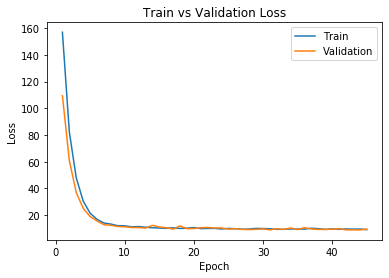

In [0]:
model_path = get_model_name("weatherSurrRNN", batch_size=30, learning_rate=0.01, epoch=45)

plot_training_curve(model_path)

# Seasonal training

In [0]:
seasonsal_RNNS = [None] * num_seasons
for i, curRNN in enumerate(seasonsal_RNNS):  
  seasonsal_RNNS[i] = weather_surr_RNN(hidden_size=glob_inp_size)
  if(use_cuda):
    seasonsal_RNNS[i] = seasonsal_RNNS[i].cuda()
  train(seasonsal_RNNS[i], trainingSet=train_seasonal_sets[i], validationSet=val_seasonal_sets[i], batch_size=30, learning_rate=0.0100021, num_epochs=45, master_path = master_path)

Training Started...
Epoch 1: Train err: 7.458822279112544, Train loss: 86.89308969598068 |Validation err: 7.228925756651621, Validation loss: 94.06863975524902
Epoch 2: Train err: 6.463659897742746, Train loss: 68.10543923628957 |Validation err: 6.500315927443924, Validation loss: 53.6107497215271
Epoch 3: Train err: 5.740293847070836, Train loss: 57.398996453536185 |Validation err: 5.842838725889778, Validation loss: 59.79685592651367
Epoch 4: Train err: 5.1116171251231926, Train loss: 45.73093203494423 |Validation err: 5.323856691246505, Validation loss: 41.194193840026855
Epoch 5: Train err: 4.59729190247727, Train loss: 36.8736014115183 |Validation err: 4.955295241632304, Validation loss: 32.803688049316406
Epoch 6: Train err: 4.230886226092831, Train loss: 31.63050059268349 |Validation err: 4.5915520639864935, Validation loss: 28.430644035339355
Epoch 7: Train err: 3.8758587064787804, Train loss: 26.492795241506474 |Validation err: 4.24939141194899, Validation loss: 25.15040493011

In [0]:
import copy

seasonsal_RNNS = [None] * num_seasons
for i, curRNN in enumerate(seasonsal_RNNS):  
  seasonsal_RNNS[i] = copy.deepcopy(weather_surr_RNN)
  if(use_cuda):
    seasonsal_RNNS[i] = seasonsal_RNNS[i].cuda()
  train(seasonsal_RNNS[i], trainingSet=train_seasonal_sets[i], validationSet=val_seasonal_sets[i], batch_size=20, learning_rate=0.00100021, num_epochs=45, master_path = master_path, ID = 'seasonal')

Training Started...
Epoch 1: Train err: 2.460897950669784, Train loss: 10.425589561462402 |Validation err: 2.813275289273524, Validation loss: 17.347142028808594
Epoch 2: Train err: 2.382110954902985, Train loss: 9.905546035085406 |Validation err: 2.809021009848668, Validation loss: 14.549346733093262
Epoch 3: Train err: 2.3720623921562036, Train loss: 9.702610492706299 |Validation err: 2.7887247723537487, Validation loss: 15.749619483947754
Epoch 4: Train err: 2.3657966564098993, Train loss: 9.833565149988447 |Validation err: 2.7904542895463798, Validation loss: 14.203149127960206
Epoch 5: Train err: 2.372612216108011, Train loss: 9.689615981919426 |Validation err: 2.790720834836855, Validation loss: 15.052495765686036
Epoch 6: Train err: 2.3668238775743236, Train loss: 9.720104541097369 |Validation err: 2.7964748759846105, Validation loss: 14.697418022155762
Epoch 7: Train err: 2.366423750152955, Train loss: 9.629515358379908 |Validation err: 2.7973455681905643, Validation loss: 14.2

In [0]:
import copy

seasonsal_GRUS = [None] * num_seasons
for i, curRNN in enumerate(seasonsal_GRUS):  
  seasonsal_GRUS[i] = copy.deepcopy(weather_surr_GRU)
  if(use_cuda):
    seasonsal_GRUS[i] = seasonsal_GRUS[i].cuda()
  train(seasonsal_GRUS[i], trainingSet=train_seasonal_sets[i], validationSet=val_seasonal_sets[i], batch_size=20, learning_rate=0.00100021, num_epochs=45, master_path = master_path, ID = 'seasonal')

Training Started...
Epoch 1: Train err: 2.319644625588651, Train loss: 9.230066682611193 |Validation err: 2.5179032570713167, Validation loss: 14.382748031616211
Epoch 2: Train err: 2.274964778523742, Train loss: 8.734739916665214 |Validation err: 2.5059319166036755, Validation loss: 11.533877944946289
Epoch 3: Train err: 2.261541804573039, Train loss: 8.531961790152959 |Validation err: 2.5297043927423246, Validation loss: 12.649765586853027
Epoch 4: Train err: 2.247905150918297, Train loss: 8.673083475657872 |Validation err: 2.5250708882625283, Validation loss: 11.655408096313476
Epoch 5: Train err: 2.25698149005572, Train loss: 8.51384152684893 |Validation err: 2.52821831545987, Validation loss: 11.968748664855957
Epoch 6: Train err: 2.2464387865075266, Train loss: 8.545604007584709 |Validation err: 2.533945288369943, Validation loss: 12.031056785583496
Epoch 7: Train err: 2.2463408300728154, Train loss: 8.491488030978612 |Validation err: 2.55244931270788, Validation loss: 11.8968042

In [0]:
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
torch.save(weatherSurrRNN.state_dict(), master_path + "Saved states/first_surr_rnn")

#Predicting A few Days Ahead

In [60]:
#janelle - 2 days ahead, (max, min) inputs
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
weather_surr_RNN = weatherSurrRNN(hidden_size=glob_inp_size, output_size=4) #number of attributes * days_ahead = 2 attributes per day * 2 days
if(use_cuda):
  weather_surr_RNN = weather_surr_RNN.cuda()
train(weather_surr_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.01, num_epochs=30, master_path = master_path)


Training Started...
Epoch 1: Train err: 0.6502519468621164, Train loss: 153.22325019313865 |Validation err: 0.6165730337078652, Validation loss: 102.44731839497884
Epoch 2: Train err: 0.5213009619789281, Train loss: 83.6203234946891 |Validation err: 0.47752808988764045, Validation loss: 58.42260201772054
Epoch 3: Train err: 0.42327072835547414, Train loss: 50.424794314658804 |Validation err: 0.40730337078651685, Validation loss: 38.48693831761678
Epoch 4: Train err: 0.3195144296839212, Train loss: 33.31140186362071 |Validation err: 0.300561797752809, Validation loss: 28.334314823150635
Epoch 5: Train err: 0.2526339899221255, Train loss: 24.901475710411596 |Validation err: 0.21348314606741572, Validation loss: 21.44170331954956
Epoch 6: Train err: 0.20774163994502978, Train loss: 20.585128784179688 |Validation err: 0.18820224719101122, Validation loss: 19.914677143096924
Epoch 7: Train err: 0.16765918460833715, Train loss: 18.16285415544902 |Validation err: 0.16573033707865167, Validati

# Graveyard of codes

c######################################################################
c######################################################################
a##########OOOOOOO#####################################OOOOOOO##########
a##########OOOOOOO#####################################OOOOOOO##########
a##########OOOOOOO#####################################OOOOOOO##########
a##########OOOOOOO#####################################OOOOOOO##########
c#######################################################################
c###############################^^^^^^^^^^^^^^##############################
c################################^^^^^^^^^^^###############################
c#################################^^^^^^^^^##############################













In [0]:
import pandas as pd
import numpy as np

start_date = 0
num_days = 7
station = "ON_6158355"
out_name = station + '_' + str(start_year) + '-' + str(end_year)
master_path = '/content/gdrive/My Drive/APS360 Team/milestone 1/'
dest_path = master_path + 'datasets/'
landmarks_frame = pd.read_csv(dest_path + out_name +'.csv')

n = 65
img_name = landmarks_frame.iloc[ start_date : start_date + num_days, [9, 11] ]
img_name = np.asarray(img_name)
landmarks = landmarks_frame.iloc[ start_date + num_days + 1, [9, 11] ]
landmarks = np.asarray(landmarks)
#landmarks = landmarks.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:2]))

Image name: [[10.1  2.6]
 [ 6.4  0.7]
 [ 8.1  2.4]
 [10.1  4.8]
 [11.9  7.7]
 [10.   4.1]
 [ 4.8  3.3]]
Landmarks shape: (2,)
First 4 Landmarks: [2.5 -3.7]


In [0]:
len(landmarks_frame)

4748

In [0]:
import pandas as pd
import numpy as np
start_year = 2007
end_year = 2019
start_date = 0
num_days = 7
station = "ON_6158355"
out_name = station + '_' + str(start_year) + '-' + str(end_year)
master_path = '/content/gdrive/My Drive/APS360 Team/milestone 1/'
dest_path = master_path + 'datasets/'
cur_csv = pd.read_csv(dest_path + out_name +'.csv')

n = 65
data = cur_csv.loc[ :6 , ['Max Temp (°C)', 'Min Temp (°C)'] ]
data = np.asarray(data)
data = data.astype('float')
label = cur_csv.loc[ 6, ['Max Temp (°C)', 'Min Temp (°C)'] ]
label = np.asarray(label)
label = label.astype('float')

data = data.flatten()
#data = np.expand_dims(data, axis=0)
#data = data.reshape((2,7))
label = np.asarray(label)
data = np.asarray(data)

print('Image name: {}'.format(data))
print('Image shape: {}'.format(data.shape))
print('Landmarks shape: {}'.format(label.shape))
print('First 4 Landmarks: {}'.format(label[:2]))

sample = [data, label]
sample

Image name: [10.1  2.6  6.4  0.7  8.1  2.4 10.1  4.8 11.9  7.7 10.   4.1  4.8  3.3]
Image shape: (14,)
Landmarks shape: (2,)
First 4 Landmarks: [4.8 3.3]


[array([10.1,  2.6,  6.4,  0.7,  8.1,  2.4, 10.1,  4.8, 11.9,  7.7, 10. ,
         4.1,  4.8,  3.3]), array([4.8, 3.3])]

In [0]:
"""num_seasons > 1 or meaningless and unknown behaviour"""
num_seasons = 4
seasonalSets = [None] * num_seasons
start_season_day = 0 # Index format (starts form 0)

#seasonIntervals = math.ceil(365.25 / num_seasons)
seasonIntervals = math.floor((trainingSet.end_date - trainingSet.start_date) / (math.floor((trainingSet.end_date - trainingSet.start_date + 1) / 365) * num_seasons))

if(start_season_day > seasonIntervals):
  start_season_day = start_season_day % seasonIntervals
  print("Truncated start_season_day to {}. Accepts values between 0 ~ {}".format(start_season_day, seasonIntervals-1))
if(start_season_day > 0):
  seasonalSets[-1] = SeasonalDataset(trainingSet, 0, start_season_day - 1)
curLastDay = seasonIntervals + start_season_day - 1
seasonalSets[0] = SeasonalDataset(trainingSet, start_season_day - trainingSet.num_days, curLastDay) # start date can include days from previous season to predict current season days

curStartDay = curLastDay + 1 
curLastDay = seasonIntervals + curStartDay - 1
i = 1
while(curLastDay < trainingSet.end_date): # Do not add the last interval
  print("seasonSetMaker " + str(i) + " " + str(curStartDay) + " " + str(curLastDay))
  if(seasonalSets[i] == None ):
    seasonalSets[i] = SeasonalDataset(trainingSet, curStartDay - trainingSet.num_days, curLastDay)
  else:
    seasonalSets[i] = seasonalSets[i] + SeasonalDataset(trainingSet, curStartDay - trainingSet.num_days, curLastDay)
  curStartDay = curLastDay + 1
  curLastDay = seasonIntervals + curStartDay - 1
  i += 1
  i %= num_seasons

# Now add the last set
curLastDay = trainingSet.end_date
if(seasonalSets[i] == None ):
    seasonalSets[i] = SeasonalDataset(trainingSet, curStartDay - trainingSet.num_days, curLastDay)
else:
    seasonalSets[i] = seasonalSets[i] + SeasonalDataset(trainingSet, curStartDay - trainingSet.num_days, curLastDay)

seasonSetMaker 1 91 181
seasonSetMaker 2 182 272
seasonSetMaker 3 273 363
seasonSetMaker 0 364 454
seasonSetMaker 1 455 545
seasonSetMaker 2 546 636
seasonSetMaker 3 637 727
seasonSetMaker 0 728 818
seasonSetMaker 1 819 909
seasonSetMaker 2 910 1000
seasonSetMaker 3 1001 1091
seasonSetMaker 0 1092 1182
seasonSetMaker 1 1183 1273
seasonSetMaker 2 1274 1364
seasonSetMaker 3 1365 1455
seasonSetMaker 0 1456 1546
seasonSetMaker 1 1547 1637
seasonSetMaker 2 1638 1728
seasonSetMaker 3 1729 1819
seasonSetMaker 0 1820 1910
seasonSetMaker 1 1911 2001
seasonSetMaker 2 2002 2092
seasonSetMaker 3 2093 2183
